In [106]:
#The goal of this program is to show that choosing N random number from a distribution with <x^2> finite
#  leads to a Gaussian distribution if N is large enough
#To get this you need to scale the sum by 1/sqrt(N)

#numpy allows for most basic math, including complex numbers
import numpy as np
#pyplot is the 'default' choice for plotting in python
import matplotlib.pyplot as plt
#math has more complicated math operations like sin, cos, exp, ...
import math

#random distribution: flat distribution in x giving xstddev as the standard deviation
def RanFlat(xstddev):
    return xstddev*(2.0*np.random.rand()-1.0)*math.sqrt(3.0)

#random distribution: quadratic distribution in x giving xstddev as the standard deviation
def RanQuad(xstddev):
    x1 = np.random.rand()
    xran = xstddev*pow(np.random.rand(),1.0/3.0)*math.sqrt(5.0/3.0)
    if(x1  < 0.5):
        xran = -xstddev*pow(np.random.rand(),1.0/3.0)*math.sqrt(5.0/3.0)
    return xran

#random distribution: distribution in x resulting from projecting a circle in x,y onto the x axis
def RanCos(xstddev):
    return xstddev*math.cos(pi*2.0*np.random.rand())*math.sqrt(2.0)

#these are variables whose value I want to use in other cells
global pi

#define pi
pi = math.pi

#set the size scale for the standard deviation
xstddev = 20.0

#initialize arrays for the velocity distribution with empty values to be filled in the loops below
nbin = 200
binx = np.empty(nbin)
#binth will hold the theoretical distribution function sqrt(alpha/pi) exp(-alpha v^2) with alpha = 1/(2 xstddev^2)
binth = np.empty(nbin)
#vbin will hold the center values for the velocity bins
xbin = np.empty(nbin)

#set parameters to use for binning the distribution
x0 =-7.0*xstddev
xf = 7.0*xstddev
dxbin = (xf - x0)/nbin

#definine how many x-values are averaged
nranx = 10

#calculate the scaling
xscal = math.sqrt((1.0*nranx))

#how many iterations to generate statistics
numiter = 100000

#set the sequence of random numbers
iseed = 1
np.random.seed(iseed)

#define the xpositions of the bins, initialize the bins that hold the distribution, and put in the theoretical value
nb=0
sum = 0.0
while nb<nbin:
    xbin[nb] = x0 + (nb+0.5)*dxbin
    #initialize the x bins
    binx[nb] = 0.0
    #put in the theoretical value for the x distribution in the limit nranx goes to infinity
    binth[nb] = math.exp(-xbin[nb]*xbin[nb]*0.5/xstddev/xstddev)/xstddev/math.sqrt(pi*2.0)
    sum += binth[nb]*dxbin
    nb+=1

#can print out the integral to make sure the theoretical distribution is normalized
#print(sum) ;

#go through the niter iterations of the random number
iter = 0
while iter<numiter:
    xran = 0.0
    iran=0
    #sum up the different random x
    while iran< nranx:
        #the next line computes each random x (choose from RanFlat, RanQuad, RanCos from above)
        xran += RanFlat(xstddev)/xscal
        iran += 1
    #find which bin this x-value goes into and increment that bin
    dum = (xran-x0)/dxbin
    i=int(dum)
    if i >= 0 and i < nbin:
        binx[i] += 1.0/(numiter*dxbin)
    iter+=1


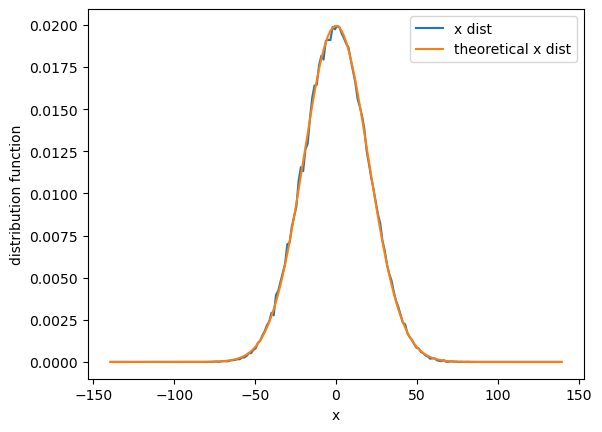

In [107]:
#plot the vx and vy velocity distribution and compare to a thermal velocity distribution
plt.plot(xbin,binx,label='x dist')
plt.plot(xbin,binth,label='theoretical x dist')
plt.legend()
plt.xlabel('x')
plt.ylabel('distribution function')
plt.show()